In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler

from pydataset import data

from pandas_profiling import ProfileReport

from wrangle import wrangle_telco
import split_scale

In [2]:
df = wrangle_telco()
df.head(1)

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.7,71,7904.25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


# Validate split_my_data()

In [4]:
train, test = split_scale.split_my_data(df)

In [5]:
train.head(1)

,customer_id,monthly_charges,tenure,total_charges
1469,8661-BOYNW,84.4,72,6096.45


In [6]:
train.shape

(1186, 4)

In [7]:
test.head(1)

,customer_id,monthly_charges,tenure,total_charges
252,1494-EJZDW,20.15,10,220.8


In [8]:
test.shape

(509, 4)

# Define my X, independent variable(s), and y, dependent/target variable

In [9]:
X_train = train[['tenure']]
X_test = test[['tenure']]
y_train = [['total_charges']]
y_test = [['total_charges']]

In [10]:
X_train.head(1)

,tenure
1469,72


In [11]:
X_test.head(1)

,tenure
252,10


In [12]:
print(X_train.shape)
print(X_test.shape)

(1186, 1)
(509, 1)


# Validate standard_scaler() function

In [13]:
scaler, X_train_scaled, X_test_scaled = split_scale.standard_scaler(X_train, X_test)


In [14]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_scaled.head()

,tenure
1469,0.838946
163,0.441745
392,0.044543
1546,0.838946
797,0.214772


In [16]:
X_test_scaled.head()

,tenure
252,-2.679126
632,0.328258
472,0.725460
1029,0.328258
910,0.782203


# Validate my scale_inverse() function

In [17]:
X_train_unscaled, X_test_unscaled = split_scale.scale_inverse(scaler, X_train_scaled, X_test_scaled)

In [18]:
X_train_unscaled.head()

,tenure
1469,72.0
163,65.0
392,58.0
1546,72.0
797,61.0


In [19]:
X_test_unscaled.head()

,tenure
252,10.0
632,63.0
472,70.0
1029,63.0
910,71.0


# Validate my uniform_scaler() function

In [20]:
df = wrangle_telco()

In [21]:
scaler, X_train_scaled, X_test_scaled = split_scale.uniform_scaler(X_train, X_test)

In [22]:
scaler

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='uniform', random_state=123,
                    subsample=100000)

In [23]:
X_train_scaled.head()

,tenure
1469,1.000000
163,0.510101
392,0.373737
1546,1.000000
797,0.424242


In [24]:
X_test_scaled.head()

,tenure
252,0.025253
632,0.469697
472,0.691919
1029,0.469697
910,0.757576


### I can peek at the distribution of the train_scaled and test_scaled if I want.

In [25]:
X_train_scaled.describe()

,tenure
count,1186.000000
mean,0.519964
std,0.317644
min,0.000000
25%,0.247475
50%,0.489899
75%,0.757576
max,1.000000


In [26]:
X_test_scaled.describe()

,tenure
count,509.000000
mean,0.507496
std,0.328644
min,0.000000
25%,0.222222
50%,0.489899
75%,0.757576
max,1.000000


# Validate my gaussian_scaler() function

In [27]:
X_train.head(1)

,tenure
1469,72


In [28]:
X_test.head(1)

,tenure
252,10


In [29]:
scaler, X_train_scaled, X_test_scaled = split_scale.gaussian_scaler(X_train, X_test)

In [30]:
scaler

PowerTransformer(copy=True, method='yeo-johnson', standardize=False)

In [31]:
X_train_scaled.head()

,tenure
1469,9950.702540
163,7856.438822
392,6040.584127
1546,9950.702540
797,6785.375569


In [32]:
X_test_scaled.head()

,tenure
252,117.379965
632,7309.661082
472,9323.346607
1029,7309.661082
910,9634.096705


# Validate my min_max_scaler() function

In [33]:
scaler, X_train_scaled, X_test_scaled = split_scale.min_max_scaler(X_train, X_test)

In [34]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
X_train_scaled.head()

,tenure
1469,1.000000
163,0.901408
392,0.802817
1546,1.000000
797,0.845070


In [36]:
X_test_scaled.head()

,tenure
252,0.126761
632,0.873239
472,0.971831
1029,0.873239
910,0.985915


# Validate my iqr_robust_scaler() function

In [37]:
scaler, X_train_scaled, X_test_scaled = split_scale.iqr_robust_scaler(X_train, X_test)

In [38]:
scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [39]:
X_train_scaled.head()

,tenure
1469,0.363636
163,0.045455
392,-0.272727
1546,0.363636
797,-0.136364


In [40]:
X_test_scaled.head()

,tenure
252,-2.454545
632,-0.045455
472,0.272727
1029,-0.045455
910,0.318182


# Looks Good! But will they work on other datasets? Let's try out a couple...

In [41]:
df = pd.read_csv('interesting_data.csv', usecols=['Region', 'Gender', 'Ageyears', 'Height_cm', 'Footlength_cm', 'Watching_TV_Hours'])

In [42]:
df.head()

,Region,Gender,Ageyears,Height_cm,Footlength_cm,Watching_TV_Hours
0,TX,Female,17.0,152,22.5,0.0
1,TN,Male,18.0,NaN,NaN,NaN
2,CO,Female,17.0,164cm,22cm,6.0
3,ID,Male,23.0,171.5,21.6,2.0
4,NC,Female,17.0,136,26,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
Region               100 non-null object
Gender               99 non-null object
Ageyears             99 non-null float64
Height_cm            95 non-null object
Footlength_cm        94 non-null object
Watching_TV_Hours    93 non-null float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [44]:
# I'm going to make this short and sweet!

df.dropna(axis=0, inplace=True)

In [45]:
# Ok, Height_cm and Footlength_cm are objects. Ugh, what's up?

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 6 columns):
Region               87 non-null object
Gender               87 non-null object
Ageyears             87 non-null float64
Height_cm            87 non-null object
Footlength_cm        87 non-null object
Watching_TV_Hours    87 non-null float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB


In [46]:
# Sheesh, look at this fool with the cm added! I'm not messing with regex right now.
# I'm going to find and drop that value.

df.Height_cm.value_counts(dropna=False).sort_index()

134      1
136      1
137      1
143      1
144      1
152      3
152.4    1
154      1
155      1
158      2
159      2
160      4
162      2
163      2
164cm    1
165      2
165.1    1
165.7    1
167      1
168      5
170      6
170.1    2
171      1
171.5    1
172      2
172.7    1
173      1
174      1
175      3
176      1
177      1
178      4
180      4
180.3    1
181      1
182      1
183      2
184      1
185      5
185.4    2
186      1
189      1
190.5    1
191      1
192.5    1
198      1
5.1      1
63       1
65       1
67       1
68       1
72       1
Name: Height_cm, dtype: int64

In [47]:
# Cool, this row has cm in Foothlength_cm, too! Wouldn't it be nice if this killed two birds with one stone?

df[df.Height_cm == '164cm']

,Region,Gender,Ageyears,Height_cm,Footlength_cm,Watching_TV_Hours
2,CO,Female,17.0,164cm,22cm,6.0


In [48]:
df.drop([2], axis=0, inplace=True)

In [49]:
df.Height_cm.value_counts(dropna=False).sort_index()

134      1
136      1
137      1
143      1
144      1
152      3
152.4    1
154      1
155      1
158      2
159      2
160      4
162      2
163      2
165      2
165.1    1
165.7    1
167      1
168      5
170      6
170.1    2
171      1
171.5    1
172      2
172.7    1
173      1
174      1
175      3
176      1
177      1
178      4
180      4
180.3    1
181      1
182      1
183      2
184      1
185      5
185.4    2
186      1
189      1
190.5    1
191      1
192.5    1
198      1
5.1      1
63       1
65       1
67       1
68       1
72       1
Name: Height_cm, dtype: int64

In [50]:
df.Footlength_cm.value_counts(dropna=False).sort_index()

10        1
10.5      1
11        1
13        1
17        1
180       1
20        2
20.5      1
21.6      1
22        3
22.5      1
22.86     1
23        6
23.7      1
24        7
24.6      1
25       12
25.5      1
26       14
27        9
27.5      1
27.9      1
28        2
28.6      1
29        5
29.3      1
30        3
32.5      1
50        1
6         1
7         1
7.5       1
9.25      1
Name: Footlength_cm, dtype: int64

In [51]:
df.Height_cm = df.Height_cm.astype(float)

In [52]:
df.Footlength_cm = df.Footlength_cm.astype(float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 99
Data columns (total 6 columns):
Region               86 non-null object
Gender               86 non-null object
Ageyears             86 non-null float64
Height_cm            86 non-null float64
Footlength_cm        86 non-null float64
Watching_TV_Hours    86 non-null float64
dtypes: float64(4), object(2)
memory usage: 4.7+ KB


## Well, we DID get so lucky. Two birds, one stone. Now split our data, and then let's scale!

In [54]:
train, test = split_scale.split_my_data(df)

In [55]:
print(train.shape)
print(test.shape)

(60, 6)
(26, 6)


In [56]:
X_train = train[['Ageyears', 'Watching_TV_Hours', 'Footlength_cm']]
X_test = test[['Ageyears', 'Watching_TV_Hours', 'Footlength_cm']]
y_train = [['Height_cm']]
y_test = [['Height_cm']]

In [57]:
print(X_train.shape)
print(X_test.shape)

(60, 3)
(26, 3)


### Let's try our standard_scaler function on our X_train and X_test

In [58]:
scaler, X_train_scaled, X_test_scaled = split_scale.standard_scaler(X_train, X_test)


In [59]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
X_train_scaled.head()

,Ageyears,Watching_TV_Hours,Footlength_cm
50,0.198419,-0.062370,-0.127418
89,-0.277787,-0.091157,0.129096
26,-0.277787,-0.206302,-0.935677
57,-0.277787,-0.105550,-0.016101
72,-0.277787,-0.119943,-0.064499


In [61]:
X_test_scaled.head(1)

,Ageyears,Watching_TV_Hours,Footlength_cm
73,-0.277787,0.254279,-0.016101


## Let's explore our train df

In [62]:
train.corr()

,Ageyears,Height_cm,Footlength_cm,Watching_TV_Hours
Ageyears,1.000000,0.124645,0.040148,0.035679
Height_cm,0.124645,1.000000,0.230122,0.093717
Footlength_cm,0.040148,0.230122,1.000000,0.964991
Watching_TV_Hours,0.035679,0.093717,0.964991,1.000000


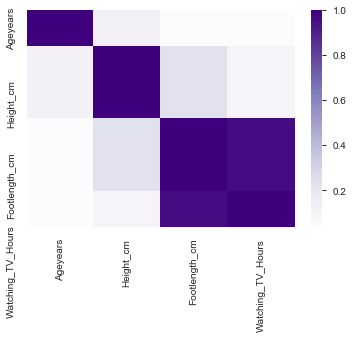

In [63]:
sns.heatmap(train.corr(), cmap='Purples')

### This Pairplot is making me think I should handle the outlier in Footlength_cm keeping me from seeing well.

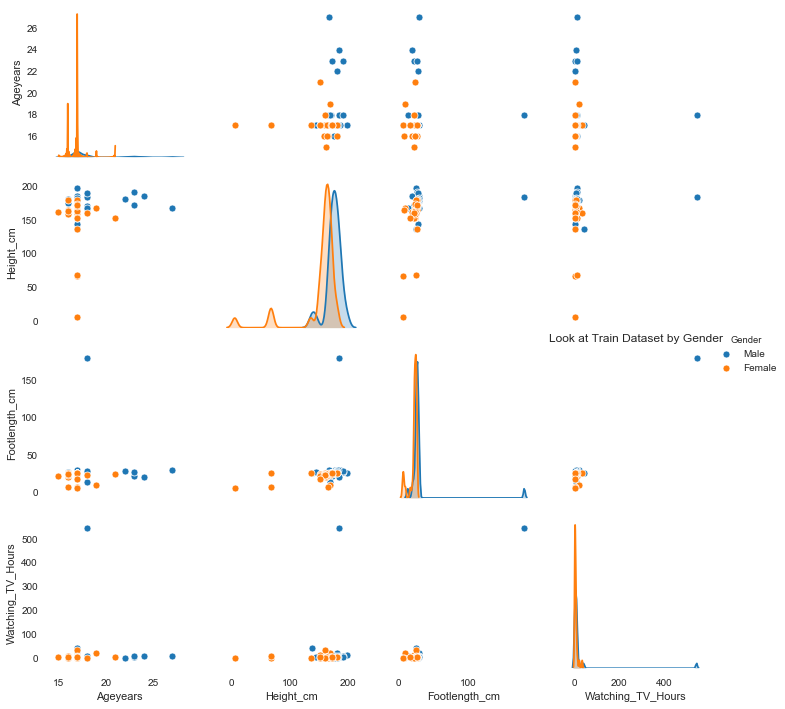

In [64]:
sns.pairplot(train, hue='Gender')

plt.title('Look at Train Dataset by Gender')
plt.show()

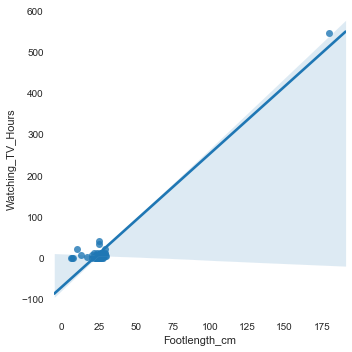

In [65]:
# Yep, I'm going to take care of that outlier right now; it HAS to be a typo

sns.lmplot(x='Footlength_cm', y='Watching_TV_Hours', data=train)
plt.show()

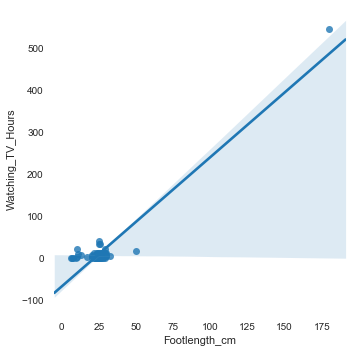

In [66]:
# I better check for outliers in the entire df to be safe. Use df instead of train

sns.lmplot(x='Footlength_cm', y='Watching_TV_Hours', data=df)
plt.show()

### Both 50 (1.6 feet) and 180 (5.9) cm are probably impossible.

In [67]:
df.Footlength_cm.value_counts().sort_index(ascending=False)

180.00     1
50.00      1
32.50      1
30.00      3
29.30      1
29.00      5
28.60      1
28.00      2
27.90      1
27.50      1
27.00      9
26.00     14
25.50      1
25.00     12
24.60      1
24.00      7
23.70      1
23.00      6
22.86      1
22.50      1
22.00      3
21.60      1
20.50      1
20.00      2
17.00      1
13.00      1
11.00      1
10.50      1
10.00      1
9.25       1
7.50       1
7.00       1
6.00       1
Name: Footlength_cm, dtype: int64

In [68]:
ProfileReport(df)